<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-151/blob/main/Reto/Reto_entrega1_equipo151.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alumnos:
Daniel López Aguilar A01121284
Jesús Christopher López González A01201236

Maestra:
María de la Paz Rico Fernández

Materia:
Ciencia y analítica de datos (Gpo 10)

Entrega:
Reto-> Entrega 1 (16/11) -> Limpieza, análisis, visualización y kmeans

Fecha:
15-11-2022

Dataset:
AGUAS SUPERFICIALES 2022

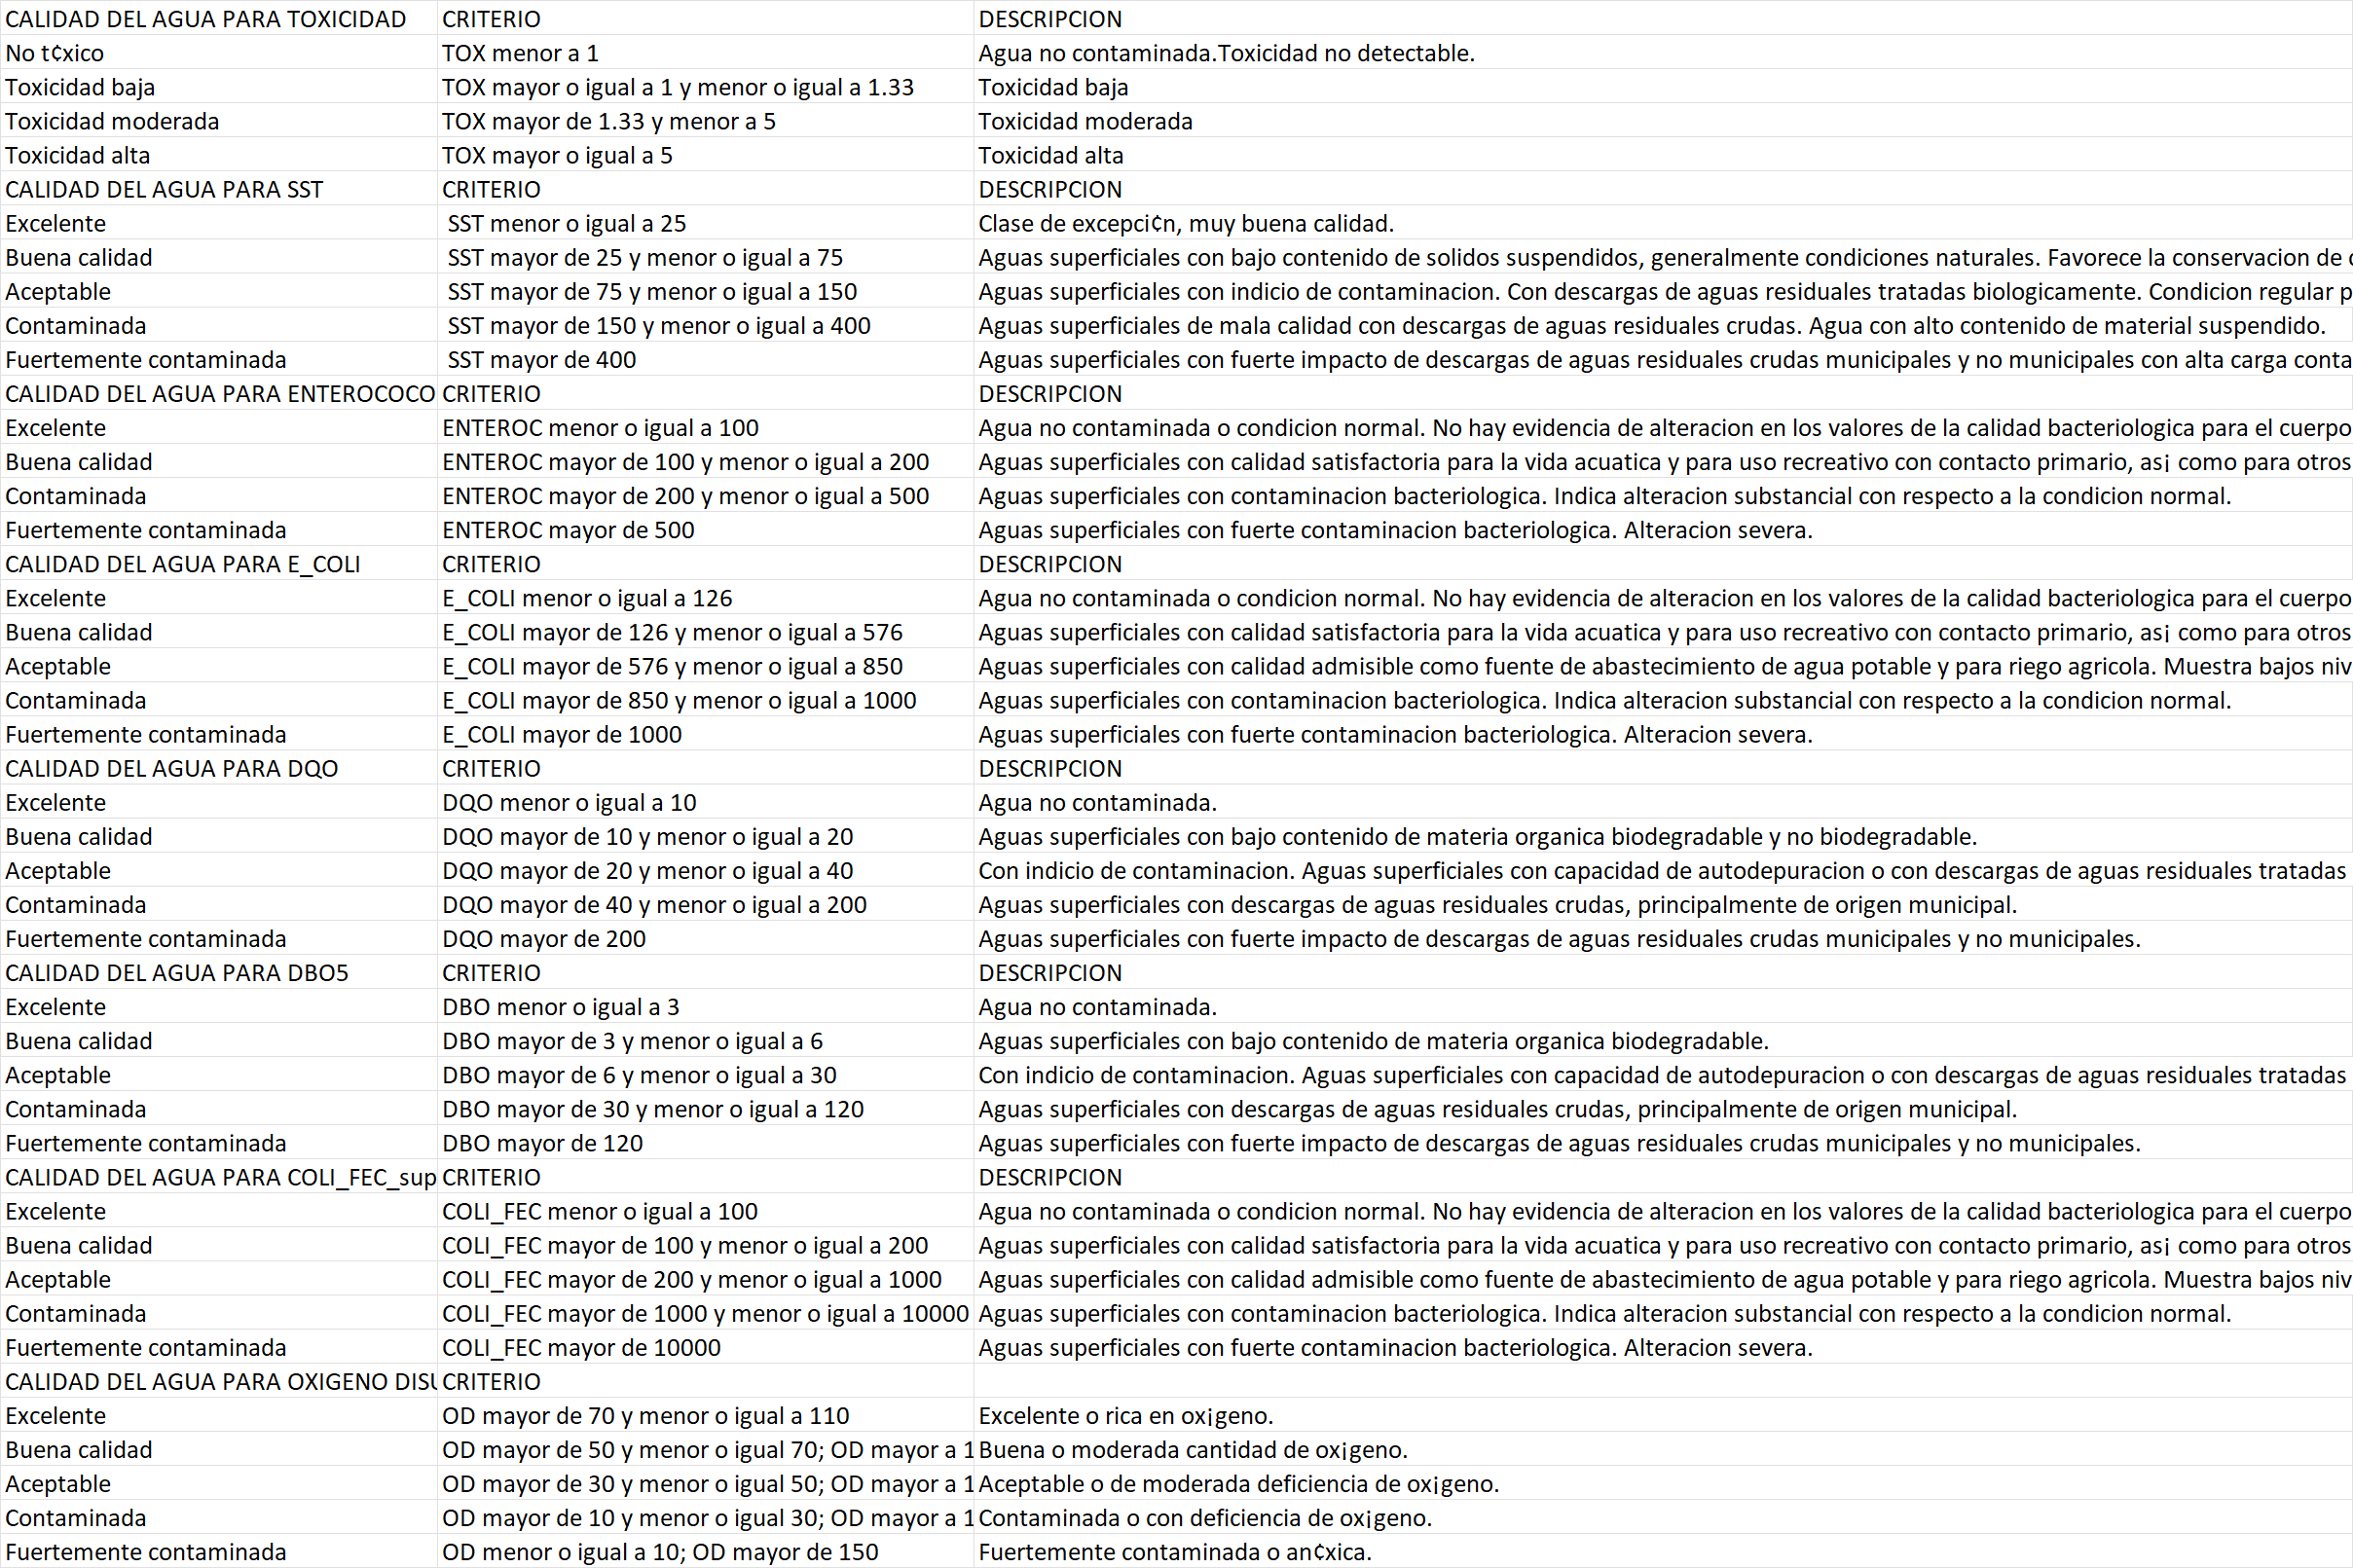

In [1]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 50.4 MB/s 
     |████████████████████████████████| 1.0 MB 47.2 MB/s 
     |████████████████████████████████| 1.7 MB 56.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 84.0 MB/s 
     |████████████████████████████████| 6.3 MB 46.7 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=7f178b3d8d8dcd5b2faa3eb1726fef4db1a5ce680f1d6964400f64361e59764e
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=53691809b40a69b96df1ab29524b9029e7d683e26c350986a1a8816ce3db2f19
  Stored in directory: /root/

In [2]:
import pandas as pd
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import qeds
qeds.themes.mpl_style();

In [3]:
data="Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv"
dataset= pd.read_csv(data, encoding = "ISO-8859-1")

In [4]:
latlong=dataset[["LATITUD","LONGITUD"]]

In [5]:
dataset["Coordinates"] = list(zip(dataset.LONGITUD, dataset.LATITUD))
dataset["Coordinates"] = dataset["Coordinates"].apply(Point)
dataset.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO,Coordinates
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,...,SI,NO,SI,NO,SI,ND,SI,SI,LENTICO,POINT (-102.33911 22.2473)
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,POINT (-109.8429 22.90473)
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,POINT (-109.86442 22.8988)
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,POINT (-109.88604 22.89609)
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,POINT (-109.89657 22.87694)


In [6]:
gdf = gpd.GeoDataFrame(dataset, geometry="Coordinates")
gdf.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO,Coordinates
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,...,SI,NO,SI,NO,SI,ND,SI,SI,LENTICO,POINT (-102.33911 22.24730)
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,POINT (-109.84290 22.90473)
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,POINT (-109.86442 22.89880)
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,POINT (-109.88604 22.89609)
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,POINT (-109.89657 22.87694)


In [7]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


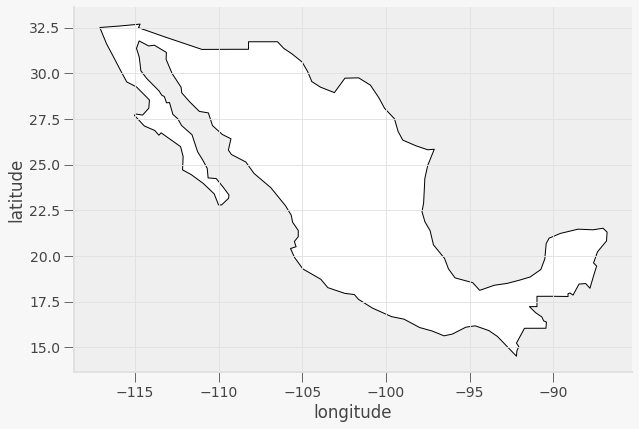

In [8]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

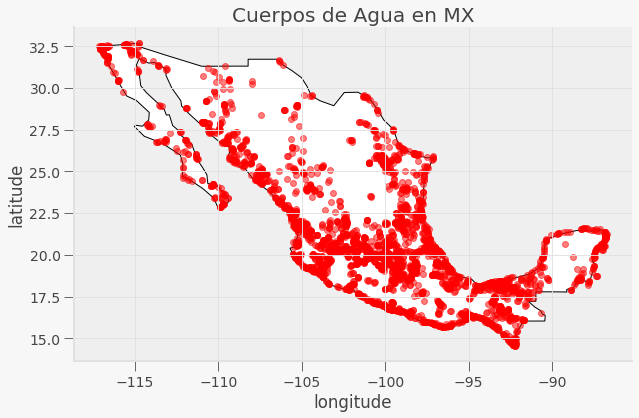

In [9]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Cuerpos de Agua en MX')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

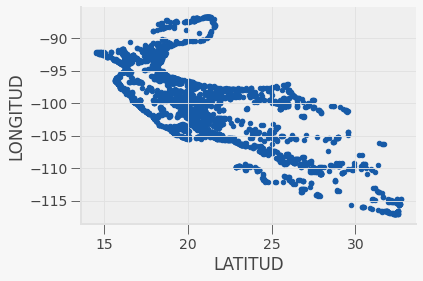

In [10]:
latlong.plot.scatter("LATITUD","LONGITUD")

In [11]:
dataset.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO,Coordinates
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,...,SI,NO,SI,NO,SI,ND,SI,SI,LENTICO,POINT (-102.33911 22.24730)
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,POINT (-109.84290 22.90473)
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,POINT (-109.86442 22.89880)
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,POINT (-109.88604 22.89609)
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,POINT (-109.89657 22.87694)


In [12]:
dataset.isnull().sum(axis=1)

0       16
1       21
2       21
3       25
4       21
        ..
3488    16
3489    16
3490    16
3491    16
3492    16
Length: 3493, dtype: int64

In [13]:
dataset.describe(exclude = None)

,LONGITUD,LATITUD,PERIODO,TOX_D_48_FON_UT,CALIDAD_TOX_D_48_FON,TOX_FIS_FON_15_UT,CALIDAD_TOX_FIS_FON_15
count,3493.000000,3493.000000,3493.0,0.0,0.0,0.0,0.0
mean,-100.359969,21.046992,2020.0,NaN,NaN,NaN,NaN
std,6.122773,3.893696,0.0,NaN,NaN,NaN,NaN
min,-117.124030,14.534910,2020.0,NaN,NaN,NaN,NaN
25%,-103.882310,18.396070,2020.0,NaN,NaN,NaN,NaN
50%,-99.795530,20.148980,2020.0,NaN,NaN,NaN,NaN
75%,-96.860230,22.828930,2020.0,NaN,NaN,NaN,NaN
max,-86.732150,32.706500,2020.0,NaN,NaN,NaN,NaN


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 56 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CLAVE                   3493 non-null   object  
 1   SITIO                   3493 non-null   object  
 2   ORGANISMO_DE_CUENCA     3493 non-null   object  
 3   ESTADO                  3493 non-null   object  
 4   MUNICIPIO               3493 non-null   object  
 5   CUENCA                  3492 non-null   object  
 6   CUERPO DE AGUA          3479 non-null   object  
 7   TIPO                    3493 non-null   object  
 8   SUBTIPO                 3479 non-null   object  
 9   LONGITUD                3493 non-null   float64 
 10  LATITUD                 3493 non-null   float64 
 11  PERIODO                 3493 non-null   int64   
 12  DBO_mg/L                2581 non-null   object  
 13  CALIDAD_DBO             2581 non-null   object  
 14  DQO_mg/L                

In [15]:
print(dataset['SITIO'].value_counts())
print(dataset['SITIO'].count())

ANTES DE LA CONFLUENCIA CON EL RIO ATOYAC    3
PRESA DERIVADORA MORELOS                     2
RIO GUANAJUATO                               2
PRESA BENITO JUAREZ CORTINA                  2
EL PUENTE                                    2
                                            ..
RIO TECOLUTLA 1                              1
PRESA LA SOLEDAD                             1
RIO CAZONES 1                                1
LAZARO CARDENAS                              1
RIO BRAVO 8 (PASO DE LOS INDIOS)             1
Name: SITIO, Length: 3481, dtype: int64
3493


In [16]:
print(dataset['ORGANISMO_DE_CUENCA'].value_counts())
print(dataset['ORGANISMO_DE_CUENCA'].count())

LERMA SANTIAGO PACIFICO         709
FRONTERA SUR                    362
PACIFICO SUR                    330
BALSAS                          329
GOLFO CENTRO                    323
GOLFO NORTE                     293
PACIFICO NORTE                  282
RIO BRAVO                       216
PENINSULA DE BAJA CALIFORNIA    211
PENINSULA DE YUCATAN            194
NOROESTE                        128
AGUAS DEL VALLE DE MEXICO        68
CUENCAS CENTRALES DEL NORTE      48
Name: ORGANISMO_DE_CUENCA, dtype: int64
3493


In [17]:
print(dataset['ESTADO'].value_counts())
print(dataset['ESTADO'].count())

VERACRUZ DE IGNACIO DE LA LLAVE    326
JALISCO                            248
CHIAPAS                            221
OAXACA                             206
GUERRERO                           205
MICHOACAN DE OCAMPO                194
SINALOA                            177
TAMAULIPAS                         171
TABASCO                            139
SONORA                             137
NAYARIT                            131
QUINTANA ROO                       117
GUANAJUATO                         108
BAJA CALIFORNIA                    106
MEXICO                             104
NUEVO LEON                         101
BAJA CALIFORNIA SUR                 95
PUEBLA                              93
SAN LUIS POTOSI                     74
DURANGO                             71
MORELOS                             69
COLIMA                              66
CAMPECHE                            53
HIDALGO                             52
QUERETARO ARTEAGA                   43
COAHUILA DE ZARAGOZA     

In [18]:
print(dataset['MUNICIPIO'].value_counts())
print(dataset['MUNICIPIO'].count())

ACAPULCO DE JUAREZ            60
BENITO JUAREZ                 42
CULIACAN                      36
TOMATLAN                      33
ENSENADA                      33
                              ..
CUENCAME                       1
RODEO                          1
SAN BERNARDO                   1
MARISCALA DE JUAREZ            1
HEROICA CIUDAD DE TLAXIACO     1
Name: MUNICIPIO, Length: 755, dtype: int64
3493


In [19]:
print(dataset['CUENCA'].value_counts())
print(dataset['CUENCA'].count())

YUCATAN (RESTO DE RH 32)    101
RIO ALTO ATOYAC              80
RIO AMACUZAC                 73
RIO LERMA 7                  56
RIO LA ANTIGUA               49
                           ... 
RIO CUITZMALA                 1
ARROYO LOBATOS                1
SAN FRANCISCO                 1
PRESA CAZADERO                1
RIO LA COMPAÑIA               1
Name: CUENCA, Length: 521, dtype: int64
3492


In [20]:
print(dataset['CUERPO DE AGUA'].value_counts())
print(dataset['CUERPO DE AGUA'].count())

OCEANO PACIFICO                139
RIO LERMA                       93
GOLFO DE MEXICO                 89
CUERPO DE AGUA DEL HUMEDAL      59
MAR CARIBE                      53
                              ... 
ARROYO CAPUENTE (LOS PESOS)      1
RIO XOPANAC                      1
RIO VALPARAISO                   1
PRESA LA ZACATECANA              1
EL LAGUITO                       1
Name: CUERPO DE AGUA, Length: 1067, dtype: int64
3479


In [21]:
print(dataset['TIPO'].value_counts())
print(dataset['TIPO'].count())

LOTICO                         1263
COSTERO (HUMEDAL)               485
LENTICO (HUMEDAL)               482
COSTERO                         343
LOTICO (HUMEDAL)                335
LENTICO                         244
LOTICO - COSTERO (HUMEDAL)       68
LOTICO - COSTERO                 46
LENTICO - COSTERO (HUMEDAL)      45
LOTICO A - Tipo 5                28
LOTICO A - Tipo 3                26
LOTICO A - Tipo 9                23
LOTICO A - Tipo 1                22
LOTICO A - Tipo 10               18
LOTICO A - Tipo 4                13
LOTICO A - Tipo 8                11
LOTICO A - Tipo 7 (HUMEDAL)      10
LOTICO A - Tipo 2                 8
LENTICO - COSTERO                 8
LOTICO A - Tipo 6                 8
LOTICO A - Tipo 7                 4
LOTICO A - Tipo 2 (HUMEDAL)       2
LOTICO A - Tipo 6 (HUMEDAL)       1
Name: TIPO, dtype: int64
3493


In [22]:
print(dataset['SUBTIPO'].value_counts())
print(dataset['SUBTIPO'].count())

RIO                             1478
PRESA                            452
LAGUNA                           328
OCEANO-MAR                       266
LAGO                             231
BAHIA                            217
ARROYO                           133
ESTERO                            80
DESCARGA                          67
CANAL                             64
ESTUARIO                          59
DREN                              36
MANGLAR                           13
MARISMA                           12
PrEsa                             11
MANANTIAL                         10
CIENEGA                            6
DESCARGA INDUSTRIAL                6
Arroyo                             2
SISTEMA DE RIEGO DE LA PRESA       1
DESCARGA MUNICIPAL                 1
EMBALSE ARTIFICIAL                 1
TRANSICION RIO-MAR                 1
CENOTE                             1
Canal                              1
Lago                               1
MAR                                1
N

In [23]:
print(dataset['PERIODO'].value_counts())
print(dataset['PERIODO'].count())

2020    3493
Name: PERIODO, dtype: int64
3493


In [24]:
print(dataset['DBO_mg/L'].value_counts())
print(dataset['DBO_mg/L'].count())

<2       1224
6          23
9          20
7          14
8          14
         ... 
21.33       1
16.67       1
500         1
150         1
39.09       1
Name: DBO_mg/L, Length: 743, dtype: int64
2581


In [25]:
print(dataset['CALIDAD_DBO'].value_counts())
print(dataset['CALIDAD_DBO'].count())

Excelente                  1330
Aceptable                   672
Buena calidad               317
Contaminada                 201
Fuertemente contaminada      61
Name: CALIDAD_DBO, dtype: int64
2581


In [26]:
print(dataset['DQO_mg/L'].value_counts())
print(dataset['DQO_mg/L'].count())

<10       559
12.29      12
16.04      11
17.64      10
48          8
         ... 
547.75      1
112.07      1
107.43      1
251         1
34.6        1
Name: DQO_mg/L, Length: 1211, dtype: int64
2581


In [27]:
print(dataset['CALIDAD_DQO'].value_counts())
print(dataset['CALIDAD_DQO'].count())

Contaminada                790
Aceptable                  635
Excelente                  562
Buena calidad              453
Fuertemente contaminada    141
Name: CALIDAD_DQO, dtype: int64
2581


In [28]:
print(dataset['SST_mg/L'].value_counts())
print(dataset['SST_mg/L'].count())

<10      880
12        48
28        47
40        46
32        46
        ... 
796.5      1
597.2      1
340.4      1
916        1
119        1
Name: SST_mg/L, Length: 1219, dtype: int64
3489


In [29]:
print(dataset['CALIDAD_SST'].value_counts())
print(dataset['CALIDAD_SST'].count())

Excelente                  1780
Buena calidad              1010
Aceptable                   314
Contaminada                 230
Fuertemente contaminada     155
Name: CALIDAD_SST, dtype: int64
3489


In [30]:
print(dataset['COLI_FEC_NMP_100mL'].value_counts())
print(dataset['COLI_FEC_NMP_100mL'].count())

24000    360
24196    182
2400     159
<3       109
11000     80
        ... 
86640      1
548        1
691        1
1446       1
389        1
Name: COLI_FEC_NMP_100mL, Length: 408, dtype: int64
2582


In [31]:
print(dataset['CALIDAD_COLI_FEC'].value_counts())
print(dataset['CALIDAD_COLI_FEC'].count())

Fuertemente contaminada    891
Contaminada                743
Aceptable                  456
Excelente                  399
Buena calidad               93
Name: CALIDAD_COLI_FEC, dtype: int64
2582


In [32]:
print(dataset['E_COLI_NMP_100mL'].value_counts())
print(dataset['E_COLI_NMP_100mL'].count())

<3       365
24000    236
24196    118
2400     107
10        83
        ... 
285        1
703        1
107        1
3880       1
195        1
Name: E_COLI_NMP_100mL, Length: 372, dtype: int64
2582


In [33]:
print(dataset['CALIDAD_E_COLI'].value_counts())
print(dataset['CALIDAD_E_COLI'].count())

Fuertemente contaminada    1054
Excelente                   970
Buena calidad               423
Contaminada                  75
Aceptable                    60
Name: CALIDAD_E_COLI, dtype: int64
2582


In [34]:
print(dataset['ENTEROC_NMP_100mL'].value_counts())
print(dataset['ENTEROC_NMP_100mL'].count())

<3       464
10        62
20        38
24196     24
4         22
        ... 
1259       1
43         1
166        1
512        1
265        1
Name: ENTEROC_NMP_100mL, Length: 185, dtype: int64
904


In [35]:
print(dataset['CALIDAD_ENTEROC'].value_counts())
print(dataset['CALIDAD_ENTEROC'].count())

Excelente                  709
Fuertemente contaminada    111
Buena calidad               43
Contaminada                 41
Name: CALIDAD_ENTEROC, dtype: int64
904


In [36]:
print(dataset['OD_PORC'].value_counts())
print(dataset['OD_PORC'].count())

<10     110
94       10
92.8      9
97.2      8
57        8
       ... 
10.9      1
19.3      1
11.6      1
17.2      1
86.4      1
Name: OD_PORC, Length: 837, dtype: int64
1797


In [37]:
print(dataset['CALIDAD_OD_PORC'].value_counts())
print(dataset['CALIDAD_OD_PORC'].count())

Excelente                  769
Buena calidad              426
Aceptable                  304
Contaminada                180
Fuertemente contaminada    118
Name: CALIDAD_OD_PORC, dtype: int64
1797


In [38]:
print(dataset['OD_PORC_SUP'].value_counts())
print(dataset['OD_PORC_SUP'].count())

<10     15
87.6     9
70.6     8
56       7
88.6     7
        ..
75.9     1
22.6     1
78.9     1
33.2     1
44.3     1
Name: OD_PORC_SUP, Length: 771, dtype: int64
1619


In [39]:
print(dataset['CALIDAD_OD_PORC_SUP'].value_counts())
print(dataset['CALIDAD_OD_PORC_SUP'].count())

Excelente                  853
Buena calidad              462
Aceptable                  201
Contaminada                 72
Fuertemente contaminada     31
Name: CALIDAD_OD_PORC_SUP, dtype: int64
1619


In [40]:
print(dataset['OD_PORC_MED'].value_counts())
print(dataset['OD_PORC_MED'].count())

<10     14
73.1     6
70.2     5
98.4     4
66       4
        ..
23.7     1
22.9     1
29.7     1
46.5     1
83.6     1
Name: OD_PORC_MED, Length: 359, dtype: int64
487


In [41]:
print(dataset['CALIDAD_OD_PORC_MED'].value_counts())
print(dataset['CALIDAD_OD_PORC_MED'].count())

Excelente                  236
Buena calidad              138
Aceptable                   73
Contaminada                 26
Fuertemente contaminada     14
Name: CALIDAD_OD_PORC_MED, dtype: int64
487


In [42]:
print(dataset['OD_PORC_FON'].value_counts())
print(dataset['OD_PORC_FON'].count())

<10      35
48.9      5
95.3      5
96        5
58.7      5
         ..
96.8      1
108.9     1
106.2     1
98.7      1
93.8      1
Name: OD_PORC_FON, Length: 556, dtype: int64
946


In [43]:
print(dataset['CALIDAD_OD_PORC_FON'].value_counts())
print(dataset['CALIDAD_OD_PORC_FON'].count())

Excelente                  409
Buena calidad              250
Aceptable                  168
Contaminada                 84
Fuertemente contaminada     35
Name: CALIDAD_OD_PORC_FON, dtype: int64
946


In [44]:
print(dataset['TOX_D_48_UT'].value_counts())
print(dataset['TOX_D_48_UT'].count())

<1       1729
1.095       2
1.761       2
1.84        2
2.332       1
         ... 
2.959       1
1.272       1
2.85        1
1.919       1
1.392       1
Name: TOX_D_48_UT, Length: 85, dtype: int64
1816


In [45]:
print(dataset['CALIDAD_TOX_D_48'].value_counts())
print(dataset['CALIDAD_TOX_D_48'].count())

No Toxico             1729
Toxicidad moderada      52
Toxicidad baja          31
Toxicidad alta           4
Name: CALIDAD_TOX_D_48, dtype: int64
1816


In [46]:
print(dataset['TOX_V_15_UT'].value_counts())
print(dataset['TOX_V_15_UT'].count())

<1        1671
9.12         2
1.874        1
2.52         1
1.54         1
          ... 
6.729        1
11.896       1
11.85        1
17.59        1
8.163        1
Name: TOX_V_15_UT, Length: 148, dtype: int64
1819


In [47]:
print(dataset['CALIDAD_TOX_V_15'].value_counts())
print(dataset['CALIDAD_TOX_V_15'].count())

No Toxico             1671
Toxicidad alta          73
Toxicidad moderada      65
Toxicidad baja          10
Name: CALIDAD_TOX_V_15, dtype: int64
1819


In [48]:
print(dataset['TOX_D_48_SUP_UT'].value_counts())
print(dataset['TOX_D_48_SUP_UT'].count())

<1       738
1.15       3
1.12       1
1.16       1
1.05       1
1.08       1
2.39       1
13.39      1
21.32      1
1.14       1
1.23       1
1.29       1
1.86       1
1.11       1
1.71       1
1.64       1
1.01       1
1.04       1
1.3        1
1.13       1
1.67       1
2.97       1
1.58       1
Name: TOX_D_48_SUP_UT, dtype: int64
762


In [49]:
print(dataset['CALIDAD TOX_D_48_SUP'].value_counts())
print(dataset['CALIDAD TOX_D_48_SUP'].count())

No Toxico             738
Toxicidad baja         15
Toxicidad moderada      7
Toxicidad alta          2
Name: CALIDAD TOX_D_48_SUP, dtype: int64
762


In [50]:
print(dataset['TOX_D_48_FON_UT'].value_counts())
print(dataset['TOX_D_48_FON_UT'].count())

Series([], Name: TOX_D_48_FON_UT, dtype: int64)
0


In [51]:
print(dataset['CALIDAD_TOX_D_48_FON'].value_counts())
print(dataset['CALIDAD_TOX_D_48_FON'].count())

Series([], Name: CALIDAD_TOX_D_48_FON, dtype: int64)
0


In [52]:
print(dataset['TOX_FIS_SUP_15_UT'].value_counts())
print(dataset['TOX_FIS_SUP_15_UT'].count())

<1      1657
2.89       2
7.86       1
5.57       1
2.36       1
2.81       1
2.21       1
1.46       1
1.4        1
4.23       1
2.87       1
5.67       1
3.04       1
7.87       1
1.09       1
2.13       1
2.32       1
Name: TOX_FIS_SUP_15_UT, dtype: int64
1674


In [53]:
print(dataset['CALIDAD_TOX_FIS_SUP_15'].value_counts())
print(dataset['CALIDAD_TOX_FIS_SUP_15'].count())

No Toxico             1657
Toxicidad moderada      12
Toxicidad alta           4
Toxicidad baja           1
Name: CALIDAD_TOX_FIS_SUP_15, dtype: int64
1674


In [54]:
print(dataset['TOX_FIS_FON_15_UT'].value_counts())
print(dataset['TOX_FIS_FON_15_UT'].count())

Series([], Name: TOX_FIS_FON_15_UT, dtype: int64)
0


In [55]:
print(dataset['CALIDAD_TOX_FIS_FON_15'].value_counts())
print(dataset['CALIDAD_TOX_FIS_FON_15'].count())

Series([], Name: CALIDAD_TOX_FIS_FON_15, dtype: int64)
0


In [56]:
print(dataset['SEMAFORO'].value_counts())
print(dataset['SEMAFORO'].count())

Verde       1267
Amarillo    1135
Rojo        1091
Name: SEMAFORO, dtype: int64
3493


In [57]:
print(dataset['CONTAMINANTES'].value_counts())
print(dataset['CONTAMINANTES'].count())

CF,E_COLI,                  439
CF,                         354
DQO,                        191
DQO,CF,E_COLI,              149
ENT_FEC,                    132
                           ... 
DBO,DQO,SST,OD%S,             1
DQO,CF,OD%F,                  1
DQO,CF,E_COLI,OD%M,OD%F,      1
CF,E_COLI,OD%S,OD%F,          1
DBO,DQO,CF,TOX_L,             1
Name: CONTAMINANTES, Length: 96, dtype: int64
2226


In [58]:
print(dataset['CUMPLE_CON_DBO'].value_counts())
print(dataset['CUMPLE_CON_DBO'].count())

SI    2319
ND     912
NO     262
Name: CUMPLE_CON_DBO, dtype: int64
3493


In [59]:
print(dataset['CUMPLE_CON_DQO'].value_counts())
print(dataset['CUMPLE_CON_DQO'].count())

SI    1650
NO     931
ND     912
Name: CUMPLE_CON_DQO, dtype: int64
3493


In [60]:
print(dataset['CUMPLE_CON_SST'].value_counts())
print(dataset['CUMPLE_CON_SST'].count())

SI    3104
NO     385
ND       4
Name: CUMPLE_CON_SST, dtype: int64
3493


In [61]:
print(dataset['CUMPLE_CON_CF'].value_counts())
print(dataset['CUMPLE_CON_CF'].count())

NO    1634
SI     948
ND     911
Name: CUMPLE_CON_CF, dtype: int64
3493


In [62]:
print(dataset['CUMPLE_CON_E_COLI'].value_counts())
print(dataset['CUMPLE_CON_E_COLI'].count())

SI    1453
NO    1129
ND     911
Name: CUMPLE_CON_E_COLI, dtype: int64
3493


In [63]:
print(dataset['CUMPLE_CON_ENTEROC'].value_counts())
print(dataset['CUMPLE_CON_ENTEROC'].count())

ND    2589
SI     752
NO     152
Name: CUMPLE_CON_ENTEROC, dtype: int64
3493


In [64]:
print(dataset['CUMPLE_CON_OD'].value_counts())
print(dataset['CUMPLE_CON_OD'].count())

SI    2958
NO     492
ND      43
Name: CUMPLE_CON_OD, dtype: int64
3493


In [65]:
print(dataset['CUMPLE_CON_TOX'].value_counts())
print(dataset['CUMPLE_CON_TOX'].count())

SI    3411
NO      82
Name: CUMPLE_CON_TOX, dtype: int64
3493


In [66]:
print(dataset['GRUPO'].value_counts())
print(dataset['GRUPO'].count())

LOTICO     1772
COSTERO     988
LENTICO     733
Name: GRUPO, dtype: int64
3493


In [67]:
dataset1 = dataset

In [68]:
dataset1.loc[dataset1["DBO_mg/L"] == "<2", "DBO_mg/L"] = 1.9
dataset1.loc[dataset1["DQO_mg/L"] == "<10", "DQO_mg/L"] = 9.9
dataset1.loc[dataset1["SST_mg/L"] == "<10", "SST_mg/L"] = 9.9
dataset1.loc[dataset1["COLI_FEC_NMP_100mL"] == "<3", "COLI_FEC_NMP_100mL"] = 2.9
dataset1.loc[dataset1["E_COLI_NMP_100mL"] == "<3", "E_COLI_NMP_100mL"] = 2.9
dataset1.loc[dataset1["ENTEROC_NMP_100mL"] == "<3", "ENTEROC_NMP_100mL"] = 2.9
dataset1.loc[dataset1["OD_PORC"] == "<10", "OD_PORC"] = 9.9
dataset1.loc[dataset1["OD_PORC_SUP"] == "<10", "OD_PORC_SUP"] = 9.9
dataset1.loc[dataset1["OD_PORC_MED"] == "<10", "OD_PORC_MED"] = 9.9
dataset1.loc[dataset1["OD_PORC_FON"] == "<10", "OD_PORC_FON"] = 9.9
dataset1.loc[dataset1["TOX_D_48_UT"] == "<1", "TOX_D_48_UT"] = .9
dataset1.loc[dataset1["TOX_V_15_UT"] == "<1", "TOX_V_15_UT"] = .9
dataset1.loc[dataset1["TOX_D_48_SUP_UT"] == "<1", "TOX_D_48_SUP_UT"] = .9
dataset1.loc[dataset1["TOX_FIS_SUP_15_UT"] == "<1", "TOX_FIS_SUP_15_UT"] = .9

In [69]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 56 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CLAVE                   3493 non-null   object  
 1   SITIO                   3493 non-null   object  
 2   ORGANISMO_DE_CUENCA     3493 non-null   object  
 3   ESTADO                  3493 non-null   object  
 4   MUNICIPIO               3493 non-null   object  
 5   CUENCA                  3492 non-null   object  
 6   CUERPO DE AGUA          3479 non-null   object  
 7   TIPO                    3493 non-null   object  
 8   SUBTIPO                 3479 non-null   object  
 9   LONGITUD                3493 non-null   float64 
 10  LATITUD                 3493 non-null   float64 
 11  PERIODO                 3493 non-null   int64   
 12  DBO_mg/L                2581 non-null   object  
 13  CALIDAD_DBO             2581 non-null   object  
 14  DQO_mg/L                

In [70]:
dataset1["DBO_mg/L"] = dataset1["DBO_mg/L"].astype(float)
dataset1["DQO_mg/L"] = dataset1["DQO_mg/L"].astype(float)
dataset1["SST_mg/L"] = dataset1["SST_mg/L"].astype(float)
dataset1["COLI_FEC_NMP_100mL"] = dataset1["COLI_FEC_NMP_100mL"].astype(float)
dataset1["E_COLI_NMP_100mL"] = dataset1["E_COLI_NMP_100mL"].astype(float)
dataset1["ENTEROC_NMP_100mL"] = dataset1["ENTEROC_NMP_100mL"].astype(float)
dataset1["OD_PORC"] = dataset1["OD_PORC"].astype(float)
dataset1["OD_PORC_SUP"] = dataset1["OD_PORC_SUP"].astype(float)
dataset1["OD_PORC_MED"] = dataset1["OD_PORC_MED"].astype(float)
dataset1["OD_PORC_FON"] = dataset1["OD_PORC_FON"].astype(float)
dataset1["TOX_D_48_UT"] = dataset1["DBO_mg/L"].astype(float)
dataset1["TOX_V_15_UT"] = dataset1["TOX_V_15_UT"].astype(float)
dataset1["TOX_D_48_SUP_UT"] = dataset1["TOX_D_48_SUP_UT"].astype(float)
dataset1["TOX_FIS_SUP_15_UT"] = dataset1["TOX_FIS_SUP_15_UT"].astype(float)

In [71]:
dataset1.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


LONGITUD                   -100.359969
LATITUD                      21.046992
PERIODO                    2020.000000
DBO_mg/L                     16.839057
DQO_mg/L                     64.311326
SST_mg/L                    102.122922
COLI_FEC_NMP_100mL        95688.804454
E_COLI_NMP_100mL          79337.673315
ENTEROC_NMP_100mL          1086.658518
OD_PORC                      66.834168
OD_PORC_SUP                  81.459049
OD_PORC_MED                  71.588090
OD_PORC_FON                  66.865539
TOX_D_48_UT                  16.839057
TOX_V_15_UT                   1.703801
TOX_D_48_SUP_UT               0.957795
TOX_D_48_FON_UT                    NaN
CALIDAD_TOX_D_48_FON               NaN
TOX_FIS_SUP_15_UT             0.925908
TOX_FIS_FON_15_UT                  NaN
CALIDAD_TOX_FIS_FON_15             NaN
dtype: float64

In [72]:
dataset1.describe()

,LONGITUD,LATITUD,PERIODO,DBO_mg/L,DQO_mg/L,SST_mg/L,COLI_FEC_NMP_100mL,E_COLI_NMP_100mL,ENTEROC_NMP_100mL,OD_PORC,...,OD_PORC_MED,OD_PORC_FON,TOX_D_48_UT,TOX_V_15_UT,TOX_D_48_SUP_UT,TOX_D_48_FON_UT,CALIDAD_TOX_D_48_FON,TOX_FIS_SUP_15_UT,TOX_FIS_FON_15_UT,CALIDAD_TOX_FIS_FON_15
count,3493.000000,3493.000000,3493.0,2581.000000,2581.000000,3489.000000,2.582000e+03,2.582000e+03,904.000000,1797.000000,...,487.000000,946.000000,2581.000000,1819.000000,762.000000,0.0,0.0,1674.000000,0.0,0.0
mean,-100.359969,21.046992,2020.0,16.839057,64.311326,102.122922,9.568880e+04,7.933767e+04,1086.658518,66.834168,...,71.588090,66.865539,16.839057,1.703801,0.957795,NaN,NaN,0.925908,NaN,NaN
std,6.122773,3.893696,0.0,65.151129,149.835921,441.865665,1.168887e+06,1.051334e+06,4305.926260,31.428242,...,26.376835,28.204583,65.151129,6.338426,0.873829,NaN,NaN,0.327605,NaN,NaN
min,-117.124030,14.534910,2020.0,1.900000,9.900000,9.900000,2.900000e+00,2.900000e+00,2.900000,9.900000,...,9.900000,9.900000,1.900000,0.900000,0.900000,NaN,NaN,0.900000,NaN,NaN
25%,-103.882310,18.396070,2020.0,1.900000,11.870000,9.900000,3.420000e+02,4.000000e+01,2.900000,44.300000,...,52.400000,47.325000,1.900000,0.900000,0.900000,NaN,NaN,0.900000,NaN,NaN
50%,-99.795530,20.148980,2020.0,2.630000,27.010000,24.300000,2.400000e+03,4.240000e+02,2.900000,68.300000,...,72.400000,67.500000,2.630000,0.900000,0.900000,NaN,NaN,0.900000,NaN,NaN
75%,-96.860230,22.828930,2020.0,10.000000,57.000000,57.000000,2.400000e+04,6.488000e+03,63.000000,91.600000,...,91.500000,88.875000,10.000000,0.900000,0.900000,NaN,NaN,0.900000,NaN,NaN
max,-86.732150,32.706500,2020.0,1500.000000,2871.250000,9430.000000,2.419600e+07,2.419600e+07,24196.000000,226.100000,...,133.000000,146.000000,1500.000000,156.250000,21.320000,NaN,NaN,7.870000,NaN,NaN


In [73]:
dataset1['DBO_mg/L'] = dataset1['DBO_mg/L'].fillna(dataset1['DBO_mg/L'].median())
dataset1['DQO_mg/L'] = dataset1['DQO_mg/L'].fillna(dataset1['DQO_mg/L'].median())
dataset1['SST_mg/L'] = dataset1['SST_mg/L'].fillna(dataset1['SST_mg/L'].median())
dataset1['COLI_FEC_NMP_100mL'] = dataset1['COLI_FEC_NMP_100mL'].fillna(dataset1['COLI_FEC_NMP_100mL'].median())
dataset1['E_COLI_NMP_100mL'] = dataset1['E_COLI_NMP_100mL'].fillna(dataset1['E_COLI_NMP_100mL'].median())
dataset1['ENTEROC_NMP_100mL'] = dataset1['ENTEROC_NMP_100mL'].fillna(dataset1['ENTEROC_NMP_100mL'].median())
dataset1['OD_PORC'] = dataset1['OD_PORC'].fillna(dataset1['OD_PORC'].median())
dataset1['OD_PORC_SUP'] = dataset1['OD_PORC_SUP'].fillna(dataset1['OD_PORC_SUP'].median())
dataset1['OD_PORC_MED'] = dataset1['OD_PORC_MED'].fillna(dataset1['OD_PORC_MED'].median())
dataset1['OD_PORC_FON'] = dataset1['OD_PORC_FON'].fillna(dataset1['OD_PORC_FON'].median())
dataset1['TOX_D_48_UT'] = dataset1['TOX_D_48_UT'].fillna(dataset1['TOX_D_48_UT'].median())
dataset1['TOX_V_15_UT'] = dataset1['TOX_V_15_UT'].fillna(dataset1['TOX_V_15_UT'].median())
dataset1['TOX_D_48_SUP_UT'] = dataset1['TOX_D_48_SUP_UT'].fillna(dataset1['TOX_D_48_SUP_UT'].median())
dataset1['TOX_FIS_SUP_15_UT'] = dataset1['TOX_FIS_SUP_15_UT'].fillna(dataset1['TOX_FIS_SUP_15_UT'].median())

In [74]:
dataset1[['DBO_mg/L', 'DQO_mg/L', 'SST_mg/L', 'COLI_FEC_NMP_100mL', 'E_COLI_NMP_100mL', 'ENTEROC_NMP_100mL', 'OD_PORC', 'OD_PORC_SUP', 'OD_PORC_MED', 'OD_PORC_FON', 'TOX_D_48_UT', 'TOX_V_15_UT', 'TOX_D_48_SUP_UT', 'TOX_FIS_SUP_15_UT']].corr()

,DBO_mg/L,DQO_mg/L,SST_mg/L,COLI_FEC_NMP_100mL,E_COLI_NMP_100mL,ENTEROC_NMP_100mL,OD_PORC,OD_PORC_SUP,OD_PORC_MED,OD_PORC_FON,TOX_D_48_UT,TOX_V_15_UT,TOX_D_48_SUP_UT,TOX_FIS_SUP_15_UT
DBO_mg/L,1.000000,0.885254,0.068473,0.614968,0.589894,-0.023332,-0.317581,0.007312,-0.007354,-0.013043,1.000000,0.580915,-0.004116,0.007246
DQO_mg/L,0.885254,1.000000,0.122724,0.581173,0.590321,-0.026584,-0.338807,0.011636,-0.009023,-0.020578,0.885254,0.531106,-0.004556,0.029365
SST_mg/L,0.068473,0.122724,1.000000,0.035776,0.034573,-0.015684,-0.013942,0.019294,0.003077,0.003014,0.068473,0.031476,-0.005136,-0.002309
COLI_FEC_NMP_100mL,0.614968,0.581173,0.035776,1.000000,0.932185,-0.008586,-0.148692,0.004078,0.000886,0.000923,0.614968,0.350345,-0.002181,-0.003789
E_COLI_NMP_100mL,0.589894,0.590321,0.034573,0.932185,1.000000,-0.008076,-0.143346,0.003641,0.000736,0.000700,0.589894,0.383480,-0.001998,-0.003503
ENTEROC_NMP_100mL,-0.023332,-0.026584,-0.015684,-0.008586,-0.008076,1.000000,0.004187,-0.071027,0.014163,0.022427,-0.023332,-0.011417,-0.003864,-0.004251
OD_PORC,-0.317581,-0.338807,-0.013942,-0.148692,-0.143346,0.004187,1.000000,-0.002101,-0.000385,-0.000392,-0.317581,-0.203335,0.001032,0.001829
OD_PORC_SUP,0.007312,0.011636,0.019294,0.004078,0.003641,-0.071027,-0.002101,1.000000,0.296630,0.346165,0.007312,0.005728,-0.035701,0.005755
OD_PORC_MED,-0.007354,-0.009023,0.003077,0.000886,0.000736,0.014163,-0.000385,0.296630,1.000000,0.612584,-0.007354,0.001049,-0.060236,0.065008
OD_PORC_FON,-0.013043,-0.020578,0.003014,0.000923,0.000700,0.022427,-0.000392,0.346165,0.612584,1.000000,-0.013043,0.001068,-0.046214,-0.027164


In [75]:
dataset2 = dataset1[['LONGITUD','LATITUD','DBO_mg/L', 'DQO_mg/L', 'SST_mg/L', 'COLI_FEC_NMP_100mL', 'E_COLI_NMP_100mL', 'ENTEROC_NMP_100mL', 'OD_PORC', 'OD_PORC_SUP', 'OD_PORC_MED', 'OD_PORC_FON', 'TOX_D_48_UT', 'TOX_V_15_UT', 'TOX_D_48_SUP_UT', 'TOX_FIS_SUP_15_UT']]

In [76]:
dataset3 = dataset2[dataset2['LONGITUD'].notnull()]

In [77]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

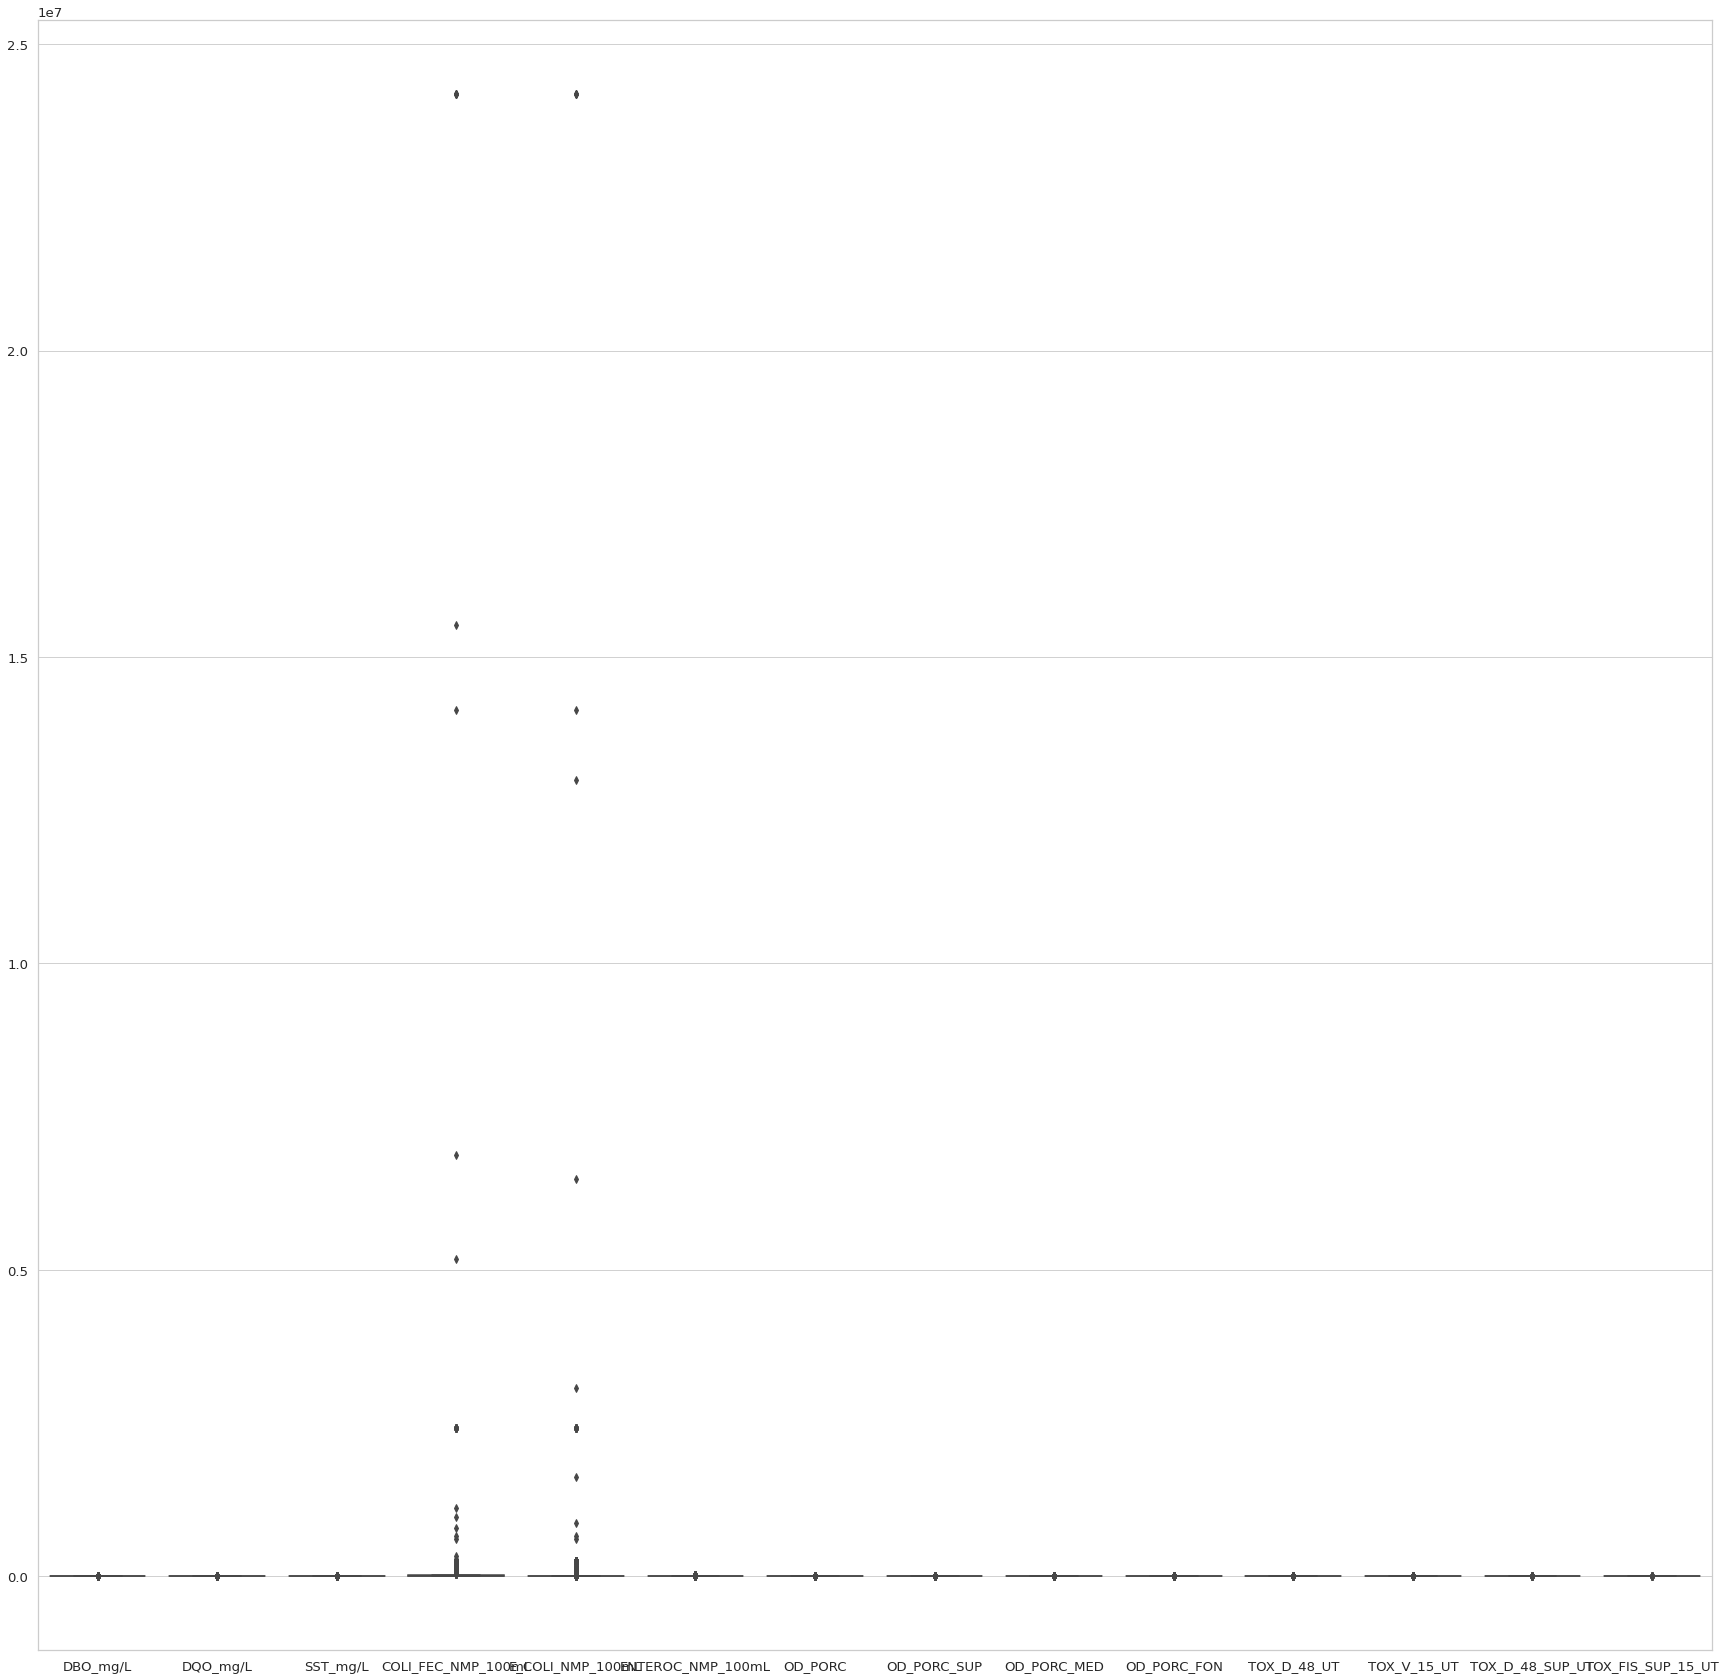

In [78]:
_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(30, 30))
sns.boxplot(data = dataset3[['DBO_mg/L', 'DQO_mg/L', 'SST_mg/L', 'COLI_FEC_NMP_100mL', 'E_COLI_NMP_100mL', 'ENTEROC_NMP_100mL', 'OD_PORC', 'OD_PORC_SUP', 'OD_PORC_MED', 'OD_PORC_FON', 'TOX_D_48_UT', 'TOX_V_15_UT', 'TOX_D_48_SUP_UT', 'TOX_FIS_SUP_15_UT']])
plt.show()

In [79]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(dataset3)
    kmeanModel.fit(dataset3)
  
    distortions.append(sum(np.min(cdist(dataset3, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / dataset3.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(dataset3, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / dataset3.shape[0]
    mapping2[k] = kmeanModel.inertia_

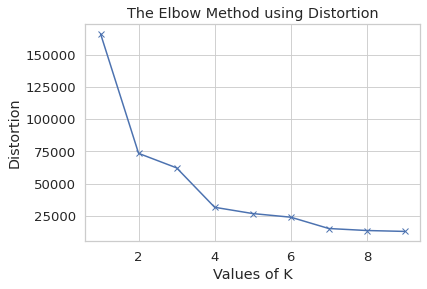

In [80]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [81]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(dataset3)

In [82]:
dataset3['cluster'] = kmeans.fit_predict(dataset3)

In [83]:
dataset3['Coordinates'] = dataset["Coordinates"]
dataset3['SEMAFORO'] = dataset["SEMAFORO"]

In [84]:
dataset3.to_csv('homework.csv')

In [85]:
dataset3.head()

,LONGITUD,LATITUD,DBO_mg/L,DQO_mg/L,SST_mg/L,COLI_FEC_NMP_100mL,E_COLI_NMP_100mL,ENTEROC_NMP_100mL,OD_PORC,OD_PORC_SUP,OD_PORC_MED,OD_PORC_FON,TOX_D_48_UT,TOX_V_15_UT,TOX_D_48_SUP_UT,TOX_FIS_SUP_15_UT,cluster,Coordinates,SEMAFORO
0,-102.33911,22.24730,6.00,54.08,13.7500,1162.0,98.0,2.9,68.3,46.8,72.4,67.5,6.00,0.9,0.9,0.9,0,POINT (-102.33911 22.24730),Rojo
1,-109.84290,22.90473,2.63,27.01,9.9000,2400.0,424.0,20.0,68.3,92.0,95.4,92.2,2.63,0.9,0.9,0.9,0,POINT (-109.84290 22.90473),Verde
2,-109.86442,22.89880,2.63,27.01,9.9000,2400.0,424.0,2.9,68.3,92.0,95.4,92.2,2.63,0.9,0.9,0.9,0,POINT (-109.86442 22.89880),Verde
3,-109.88604,22.89609,2.63,27.01,13.9667,2400.0,424.0,2.9,68.3,84.1,72.4,86.7,2.63,0.9,0.9,0.9,0,POINT (-109.88604 22.89609),Verde
4,-109.89657,22.87694,2.63,27.01,9.9000,2400.0,424.0,30.0,68.3,96.2,95.9,95.5,2.63,0.9,0.9,0.9,0,POINT (-109.89657 22.87694),Verde


In [86]:
cluster_0 = dataset3[dataset3['cluster']==0]
cluster_1 = dataset3[dataset3['cluster']==1]
cluster_2 = dataset3[dataset3['cluster']==2]
cluster_3 = dataset3[dataset3['cluster']==3]

In [87]:
gdf_0 = gpd.GeoDataFrame(cluster_0, geometry="Coordinates")
gdf_1 = gpd.GeoDataFrame(cluster_1, geometry="Coordinates")
gdf_2 = gpd.GeoDataFrame(cluster_2, geometry="Coordinates")
gdf_3 = gpd.GeoDataFrame(cluster_3, geometry="Coordinates")

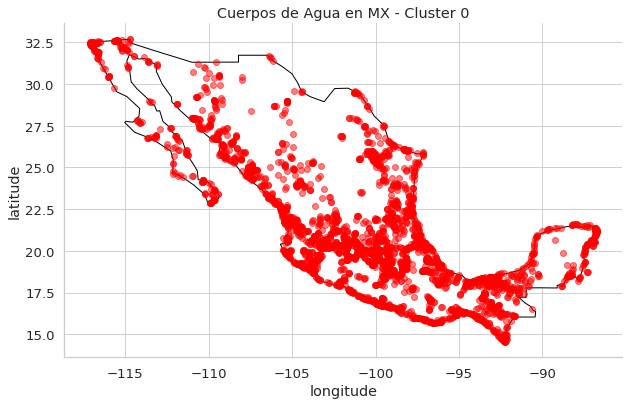

In [88]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf_0.plot(ax=gax, color='red', alpha = 0.5)
# gdf.plot(ax=gax[['cluster']]==1, color='blue', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Cuerpos de Agua en MX - Cluster 0')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

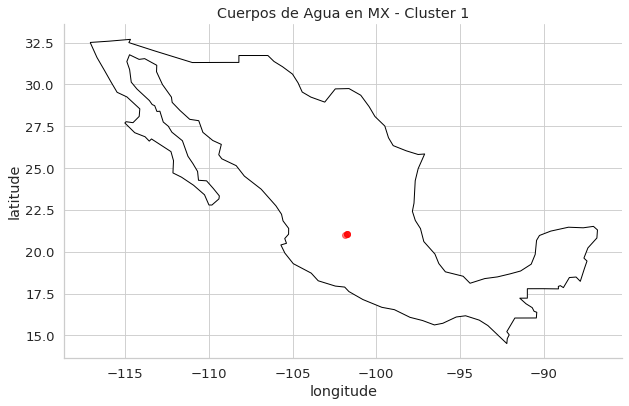

In [89]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf_1.plot(ax=gax, color='red', alpha = 0.5)
# gdf.plot(ax=gax[['cluster']]==1, color='blue', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Cuerpos de Agua en MX - Cluster 1')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

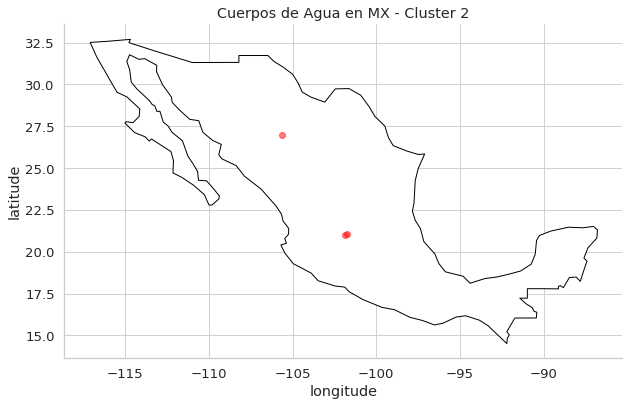

In [90]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf_2.plot(ax=gax, color='red', alpha = 0.5)
# gdf.plot(ax=gax[['cluster']]==1, color='blue', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Cuerpos de Agua en MX - Cluster 2')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

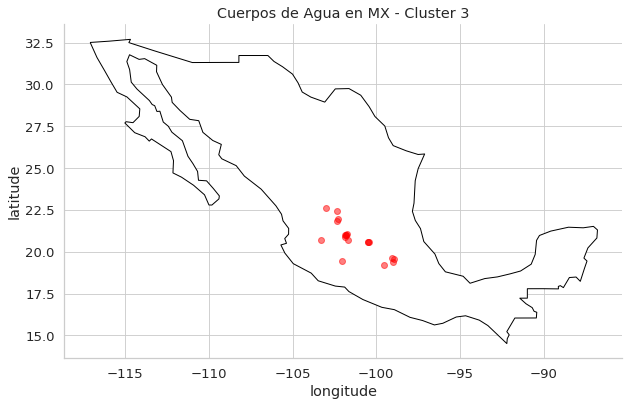

In [91]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf_3.plot(ax=gax, color='red', alpha = 0.5)
# gdf.plot(ax=gax[['cluster']]==1, color='blue', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Cuerpos de Agua en MX - Cluster 3')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()